In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from modAL.utilities import classifier_uncertainty

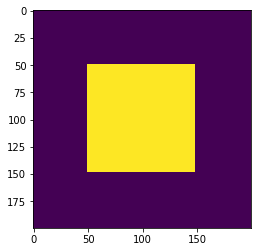

In [3]:
im_width = 200
im_height = 200
data = np.zeros((im_height, im_width))
data[50:199-50, 50:199-50] = 1
plt.imshow(data)

In [4]:
# create the data from the image
X = np.transpose(
    [np.tile(np.asarray(range(data.shape[0])), data.shape[1]),
     np.repeat(np.asarray(range(data.shape[1])), data.shape[0])]
)
# map the intensity values against the grid
y = np.asarray([data[P[0], P[1]] for P in X])

# adding 10 points to the dataset
initial_idx = np.random.choice(range(len(y)), size=10)
X_train, y_train = X[initial_idx], y[initial_idx]
# to make sure that the initial dataset contains at least two classes,
# we repeat the above process until it is satisfied
while len(np.unique(y_train)) == 1:
    initial_idx = np.random.choice(range(len(y)), size=10)
    X_train, y_train = X[initial_idx], y[initial_idx]

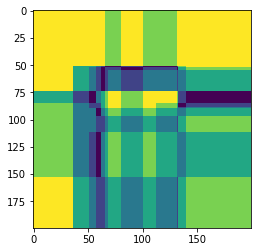

In [7]:
# create an ActiveLearner instance
learner = ActiveLearner(
    predictor=RandomForestClassifier(), utility_function=classifier_uncertainty,
    training_data=X_train, training_labels=y_train
)

for round_idx in range(5):
    query_idx, query_inst = learner.query(X)
    learner.add_and_retrain(X[query_idx].reshape(1, -1), y[query_idx].reshape(-1, ))

plt.imshow(learner.predict(X).reshape(im_height, im_width))